In [42]:
#Importing Libraries

In [43]:
import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D

from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm

In [44]:
#Extract Filenames from Folder

In [45]:
filenames = []
for file in os.listdir('images'):
    filenames.append(os.path.join('images',file))
    

In [46]:
len(filenames)

560

In [47]:
#Importing ResNet50 Model and Cofiguration

In [48]:
model = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
model.trainable = False

model = tf.keras.models.Sequential([model,
                                   GlobalMaxPool2D()
                                   ])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)           │ (None, 7, 7, 2048)     │    23,587,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling2d_1          │ (None, 2048)           │             0 │
│ (GlobalMaxPooling2D)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [49]:
#Extracting Fetaures from Image

In [50]:
img = image.load_img('16871.jpg', target_size=(224,224))
img_array = image.img_to_array(img)
img_expand_dim = np.expand_dims(img_array, axis=0)
img_preprocess = preprocess_input(img_expand_dim)
result = model.predict(img_preprocess).flatten()
norm_result = result/norm(result)
norm_result

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step


array([0.        , 0.00295299, 0.        , ..., 0.00752507, 0.02113524,
       0.0040174 ], dtype=float32)

In [51]:
def extract_features_from_images(image_path, model):
    img = image.load_img(image_path, target_size=(224,224))
    img_array = image.img_to_array(img)
    img_expand_dim = np.expand_dims(img_array, axis=0)
    img_preprocess = preprocess_input(img_expand_dim)
    result = model.predict(img_preprocess).flatten()
    norm_result = result/norm(result)
    return norm_result

In [52]:
extract_features_from_images(filenames[0], model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 235ms/step


array([0.00491865, 0.05812976, 0.00543876, ..., 0.00351521, 0.05245368,
       0.03639518], dtype=float32)

In [53]:
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))
image_features

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 340ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 226ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 172ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 296ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 167ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 178ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

[array([0.00491865, 0.05812976, 0.00543876, ..., 0.00351521, 0.05245368,
        0.03639518], dtype=float32),
 array([5.5097271e-06, 1.0178068e-01, 2.0306818e-02, ..., 2.6299662e-03,
        2.3691952e-02, 4.2438045e-02], dtype=float32),
 array([0.00368397, 0.06017023, 0.00153247, ..., 0.00427824, 0.02528009,
        0.04479659], dtype=float32),
 array([0.01868856, 0.0332204 , 0.00327045, ..., 0.02462125, 0.01719642,
        0.0138179 ], dtype=float32),
 array([0.        , 0.02540988, 0.        , ..., 0.02201726, 0.05976259,
        0.0143874 ], dtype=float32),
 array([0.        , 0.0319598 , 0.        , ..., 0.00272934, 0.04561885,
        0.01183026], dtype=float32),
 array([0.01696396, 0.04771775, 0.00098639, ..., 0.01189143, 0.0396345 ,
        0.03552546], dtype=float32),
 array([0.0117138 , 0.03857011, 0.00051161, ..., 0.02004125, 0.02958979,
        0.02161428], dtype=float32),
 array([0.        , 0.03699745, 0.01303427, ..., 0.00977646, 0.01712197,
        0.02275788], dtype=fl

In [54]:
Image_features = pkl.dump(image_features, open('Images_features.pkl','wb'))

In [55]:
filenames = pkl.dump(filenames, open('filenames.pkl','wb'))

In [56]:
#Loading Pickle Files

In [57]:
Image_features = pkl.load(open('Images_features.pkl','rb'))

In [58]:
filenames = pkl.load(open('filenames.pkl','rb'))

In [59]:
np.array(Image_features).shape

(560, 2048)

In [60]:
#Finidng Simialar Images

In [61]:
neighbors = NearestNeighbors(n_neighbors=6, algorithm='brute', metric='euclidean')

In [62]:
neighbors.fit(Image_features)

NearestNeighbors(algorithm='brute', metric='euclidean', n_neighbors=6)

In [63]:
input_image = extract_features_from_images('16871.jpg',model)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step


In [64]:
distance, indices = neighbors.kneighbors([input_image])

In [65]:
indices[0]

array([119, 118, 126, 120, 123, 121], dtype=int64)

In [66]:
from IPython.display import Image

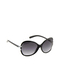

In [67]:
Image('16871.jpg')

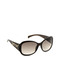

In [68]:
Image(filenames[indices[0][1]])

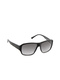

In [69]:
Image(filenames[indices[0][2]])

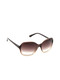

In [70]:
Image(filenames[indices[0][3]])

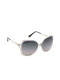

In [71]:
Image(filenames[indices[0][4]])

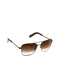

In [72]:
Image(filenames[indices[0][5]])